In [84]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [28]:
data = pd.read_csv("/Users/jonahwilliams/Documents/Kaggle/Mosquito/train.csv")
data.head(n=2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


Okay so we got the data...now what?  Well it looks like we have some species information that could be important - we can convert this column to a series of binary indicator columns - one for each species.

I'm also assuming that "CULEX PIPENS/RESTUANS" means both were present, not some sort of unholy hybrid mosquito..

In [29]:
species = np.unique(data['Species'])
species

array(['CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS',
       'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TARSALIS',
       'CULEX TERRITANS'], dtype=object)

In [30]:
data["spec_1"] = data["Species"].map(lambda x: int("ERRATICUS" in x))
data["spec_2"] = data["Species"].map(lambda x: int("PIPENS" in x))
data["spec_3"] = data["Species"].map(lambda x: int("RESTUANS" in x))
data["spec_4"] = data["Species"].map(lambda x: int("SALINARIUS" in x))
data["spec_5"] = data["Species"].map(lambda x: int("TARSALIS" in x))
data["spec_6"] = data["Species"].map(lambda x: int("TERRITANS" in x))
data = data.drop(["Species"], axis=1)
data.head(n=2)

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,spec_1,spec_2,spec_3,spec_4,spec_5,spec_6
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,0,0,1,0,0,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,0,0,1,0,0,0


Since I have Lat/Lon, I don't thinnk I need the specific street address

In [31]:
data = data.drop(["Address", "Block", "AddressNumberAndStreet", "Street", "AddressAccuracy"], axis=1)
data.head(n=10)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,spec_1,spec_2,spec_3,spec_4,spec_5,spec_6
0,2007-05-29,T002,41.954690,-87.800991,1,0,0,0,1,0,0,0
1,2007-05-29,T002,41.954690,-87.800991,1,0,0,0,1,0,0,0
2,2007-05-29,T007,41.994991,-87.769279,1,0,0,0,1,0,0,0
3,2007-05-29,T015,41.974089,-87.824812,1,0,0,0,1,0,0,0
4,2007-05-29,T015,41.974089,-87.824812,4,0,0,0,1,0,0,0
5,2007-05-29,T045,41.921600,-87.666455,2,0,0,0,1,0,0,0
6,2007-05-29,T046,41.891118,-87.654491,1,0,0,0,1,0,0,0
7,2007-05-29,T048,41.867108,-87.654224,1,0,0,0,1,0,0,0
8,2007-05-29,T048,41.867108,-87.654224,2,0,0,0,1,0,0,0
9,2007-05-29,T049,41.896282,-87.655232,1,0,0,0,1,0,0,0


Below we have all the dates that the various traps were checked

In [35]:
np.unique(data["Date"])

array(['2007-05-29', '2007-06-05', '2007-06-26', '2007-06-29',
       '2007-07-02', '2007-07-11', '2007-07-18', '2007-07-19',
       '2007-07-25', '2007-07-27', '2007-08-01', '2007-08-02',
       '2007-08-03', '2007-08-07', '2007-08-08', '2007-08-09',
       '2007-08-15', '2007-08-16', '2007-08-17', '2007-08-21',
       '2007-08-22', '2007-08-24', '2007-08-28', '2007-09-04',
       '2007-09-05', '2007-09-06', '2007-09-12', '2007-09-18',
       '2007-09-19', '2007-09-24', '2007-09-25', '2007-10-04',
       '2007-10-09', '2009-05-28', '2009-06-02', '2009-06-03',
       '2009-06-05', '2009-06-12', '2009-06-15', '2009-06-19',
       '2009-06-22', '2009-06-26', '2009-06-29', '2009-07-06',
       '2009-07-10', '2009-07-13', '2009-07-17', '2009-07-24',
       '2009-07-27', '2009-07-31', '2009-08-07', '2009-08-13',
       '2009-08-25', '2009-08-27', '2009-09-03', '2009-09-14',
       '2009-09-17', '2009-09-25', '2009-10-01', '2011-06-10',
       '2011-06-17', '2011-06-24', '2011-06-30', '2011-

As a Rough simplifying assumption, I'm going to group all of the satelite traps together

In [41]:
trap_locations = data[['Trap', 'Latitude', 'Longitude']].groupby(["Trap"]).mean()
trap_locations.head()

,Latitude,Longitude
Trap,,
T001,41.953705,-87.733974
T002,41.954690,-87.800991
T003,41.964242,-87.757639
T004,41.962728,-87.748367
T005,41.942114,-87.776385


In [46]:
grouped_count = data[["Date","Trap","NumMosquitos"]].groupby(["Date","Trap"]).sum()
grouped_presence = data[["Date","Trap","WnvPresent"]].groupby(["Date","Trap"]).max()

In [49]:
grouped_count.head(n=5)

NumMosquitos
Date       Trap              
2007-05-29 T002             2
           T007             1
           T015             5
           T045             2
           T046             1

In [50]:
grouped_presence.head(n=5)

WnvPresent
Date       Trap            
2007-05-29 T002           0
           T007           0
           T015           0
           T045           0
           T046           0

So immediate problems - we have missing data: not every trap is checked every time.  The solution is a GP prior!

In [65]:
inference = pd.merge(grouped_presence, grouped_count, left_index=True, right_index=True)
inference.reset_index(inplace=True)
inference = pd.merge(inference, trap_locations, left_on="Trap", right_index=True)
inference.head(n=10)

,Date,Trap,WnvPresent,NumMosquitos,Latitude,Longitude
0,2007-05-29,T002,0,2,41.95469,-87.800991
18,2007-06-05,T002,0,9,41.95469,-87.800991
59,2007-06-26,T002,0,6,41.95469,-87.800991
103,2007-06-29,T002,0,2,41.95469,-87.800991
138,2007-07-02,T002,0,5,41.95469,-87.800991
187,2007-07-11,T002,0,27,41.95469,-87.800991
262,2007-07-18,T002,0,13,41.95469,-87.800991
347,2007-07-27,T002,0,35,41.95469,-87.800991
399,2007-08-01,T002,1,179,41.95469,-87.800991
538,2007-08-07,T002,0,26,41.95469,-87.800991


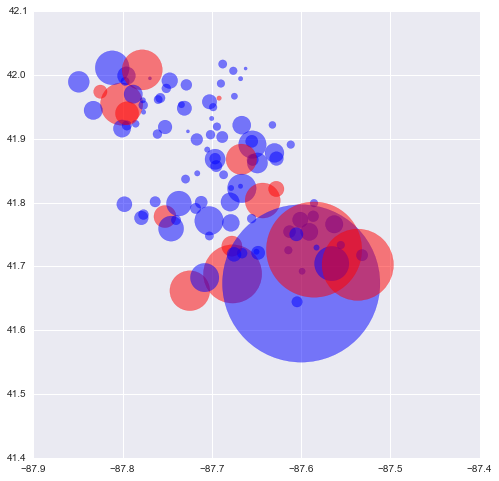

In [93]:
subset = inference[inference.Date == '2007-08-01']
x2 = subset.Latitude.values
x1 = subset.Longitude.values
size = subset.NumMosquitos.values
colors = ["blue", "red"]
color = map(lambda x: colors[x] ,subset.WnvPresent.values)

plt.figure(figsize=(8, 8))
sns.set_style("darkgrid")
plt.scatter(x1, x2, s=10 * size, color=color, alpha=0.5)
plt.show()

In the Above, Red denotes the presence of west nile, the size of the scatterplot encodes the number of mosquitos.  X and Y positions are determined by longitude and lattitude of the traps

Now here is where Gaussian Processes come in - For starters, we'd like to have a continuous "density" of mosquitos so that we can interpolate missing values between years.  Except instead of randomly sampling some unknown function - we well be taking our measurements as the random draws.


Lets start with the density from just one particular day

In [231]:
def kernel(A, B, ls=0.1):
    kernel_matrix = np.zeros((A.shape[0], B.shape[0]), dtype=np.float64)
    for i in xrange(len(A)):
        for j in xrange(len(B)):
            r = sum(np.square(A[i] - B[j]))
            kernel_matrix[i][j] = r
    return np.exp( -kernel_matrix / ls)

N = 103         # number of training points.
n = 20         # number of test points.
s = 0.0001          # noise variance.
X = subset[["Latitude","Longitude"]].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
x1_min = min(X[:,0])
x1_max = max(X[:,0])
x2_max = max(X[:,1])
x2_min = min(X[:,1])



y = subset.NumMosquitos.values
K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))


x1 = np.linspace(x1_min, x1_max, n)
x2 = np.linspace(x2_min, x2_max, n)
Xtest = np.array([[a, b] for a in x1 for b in x2])


Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

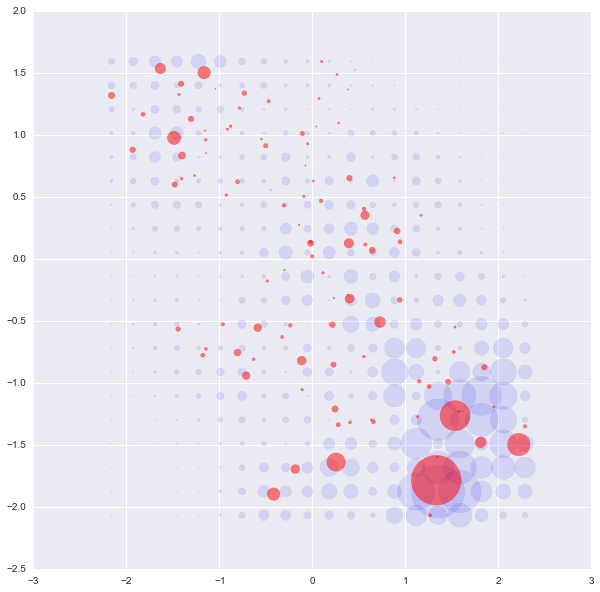

In [232]:
plt.figure(figsize=(10, 10))
plt.scatter(Xtest[:, 1], Xtest[:, 0], s=np.abs(mu) + 1, alpha=0.1)
plt.scatter(X[:, 1], X[:, 0], s=y, color="Red", alpha=0.5)
plt.show()

Red = Observed Data, Blue is interpolated

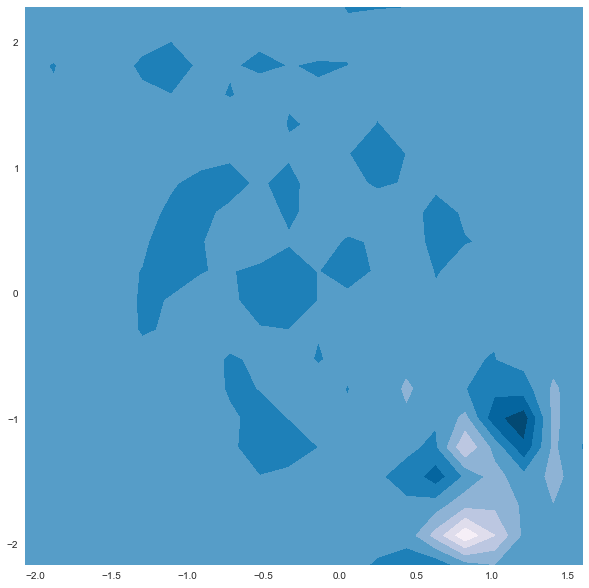

In [233]:
plt.figure(figsize=(10, 10))
contour_mu = mu 
contour_mu.shape = (20, 20)
plt.contourf(np.linspace(x1_min, x1_max, n), np.linspace(x2_min, x2_max, n), contour_mu, cmap="PuBu_r")
plt.show()